In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/iris.txt')
sb.pairplot(df, hue='target')

In [ ]:
# axis = 1 indica que vamos pegar uma coluna e não uma linha
df = np.array(df.drop('target', axis = 1))

In [ ]:
# random_state evita nas próximas vezes reduzir as aleatoriedades
# forçando o algoritmo a criar centróides próximos das últimas vezes
kmeans = KMeans(n_clusters = 3, random_state = 0)

In [ ]:
# treinando o algoritmo
kmeans.fit(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
''' Na biblioteca scikit-learn a soma dos quadrados intra-clusters (wcss) é chamada de inertia (inércia).
função que calcula e armazena essa inércia (ou wcss) para cada quantidade de clusters (partindo de 2 até 20
clusters no máximo) '''

def soma_quadrados_intra_clusters(dataset):
  wcss = []
  for n in range(2,21):
    kmeans = KMeans(n_clusters = n)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
  return wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Soma dos quadrados intra-clusters ')

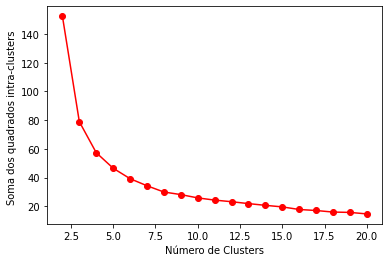

In [ ]:
n_clusters = list(range(2,21))
somas = soma_quadrados_intra_clusters(df)
plt.plot(n_clusters, somas, '-o', color = 'red')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters ')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Soma dos quadrados intra-clusters ')

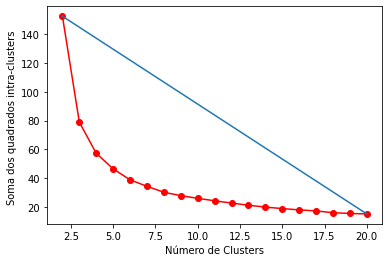

In [ ]:
n_clusters = list(range(2,21))
somas = soma_quadrados_intra_clusters(df)
plt.plot(n_clusters, somas, '-o', color = 'red')
plt.plot([2,20], [somas[0], somas[-1]])
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos quadrados intra-clusters ')

In [ ]:
def numero_otimo_clusters(wcss):
  import math
  x0=2
  y0 = wcss[0]
  x1 = 20
  y1 = wcss[-1]

  distancias = []

  for i in range(len(wcss)):
    x = i+2
    y = wcss[i]
    numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
    denominador = math.sqrt((y1 - y0)**2 + (x1 - x0)**2)
    distancias.append(numerador/denominador)

  return distancias.index(max(distancias))+2

In [ ]:
k_otimo = numero_otimo_clusters(somas)
print('Número ideal de clusters: ', k_otimo)

Número ideal de clusters:  5
